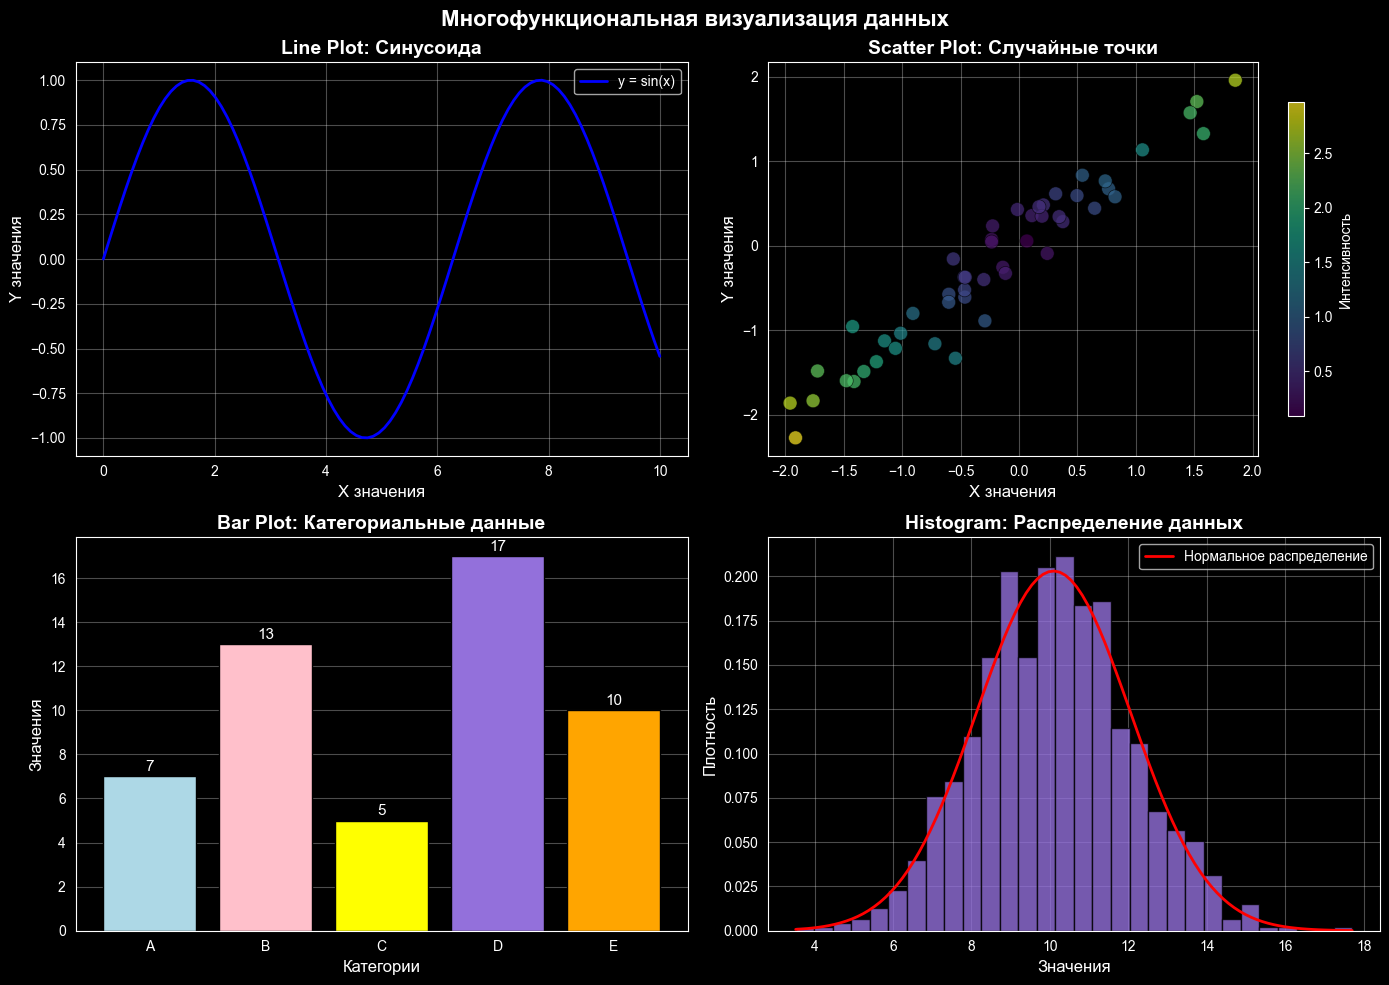

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Генерируем данные
np.random.seed(42)
x_line = np.linspace(0, 10, 100)
y_line = np.sin(x_line)

x_scatter = np.random.randn(50)
y_scatter = x_scatter + np.random.randn(50) * 0.3

categories = ["A", "B", "C", "D", "E"]
values_bar = [7, 13, 5, 17, 10]

data_hist = np.random.randn(1000) * 2 + 10  # нормальное распределение

# Создаем figure с несколькими subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 1) Line plot
axes[0].plot(x_line, y_line, color="blue", linewidth=2, label="y = sin(x)")
axes[0].set_title("Line Plot: Синусоида", fontsize=14, fontweight="bold")
axes[0].set_xlabel("X значения", fontsize=12)
axes[0].set_ylabel("Y значения", fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10)

# 2) Scatter plot
colors_scatter = np.sqrt(x_scatter ** 2 + y_scatter ** 2)  # Расстояние от начала координат
scatter = axes[1].scatter(
    x_scatter,
    y_scatter,
    c=colors_scatter,
    s=100,
    alpha=0.7,
    cmap="viridis",
    edgecolors="black",
    linewidth=0.5,
)
axes[1].set_title("Scatter Plot: Случайные точки", fontsize=14, fontweight="bold")
axes[1].set_xlabel("X значения", fontsize=12)
axes[1].set_ylabel("Y значения", fontsize=12)
axes[1].grid(True, alpha=0.3)
# Добавляем colorbar
plt.colorbar(scatter, ax=axes[1], label="Интенсивность", shrink=0.8)

# 3) Bar plot
bar_colors = ["lightblue", "pink", "yellow", "mediumpurple", "orange"]

bars = axes[2].bar(categories, values_bar, color=bar_colors, edgecolor="black")
axes[2].set_title("Bar Plot: Категориальные данные", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Категории", fontsize=12)
axes[2].set_ylabel("Значения", fontsize=12)
axes[2].xaxis.grid(False)
axes[2].grid(True, alpha=0.3, axis="y")
# Добавляем значения над столбцами
for bar in bars:
    height = bar.get_height()
    axes[2].text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.1,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=11,
    )

# 4) Histogram
axes[3].hist(
    data_hist, bins=30, color="mediumpurple", edgecolor="black", alpha=0.8, density=True
)

x_hist = np.linspace(min(data_hist), max(data_hist), 100)
pdf = norm.pdf(x_hist, np.mean(data_hist), np.std(data_hist))
axes[3].plot(x_hist, pdf, "r-", linewidth=2, label="Нормальное распределение")
axes[3].set_title("Histogram: Распределение данных", fontsize=14, fontweight="bold")
axes[3].set_xlabel("Значения", fontsize=12)
axes[3].set_ylabel("Плотность", fontsize=12)
axes[3].grid(True, alpha=0.3)
axes[3].legend(loc="upper right", fontsize=10)

# Настраиваем общий layout
plt.suptitle("Многофункциональная визуализация данных", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

# Сохранение figure (опционально)
# fig.savefig('multi_plot.png', dpi=300, bbox_inches='tight')


# TODO: Создать figure с несколькими subplots
# 1) Line plot
# 2) Scatter plot
# 3) Bar plot
# 4) Histogram
# Настроить: titles, labels, legends, colors, размер фигуры

1) Pairplot с hue по OverallQual_Cat


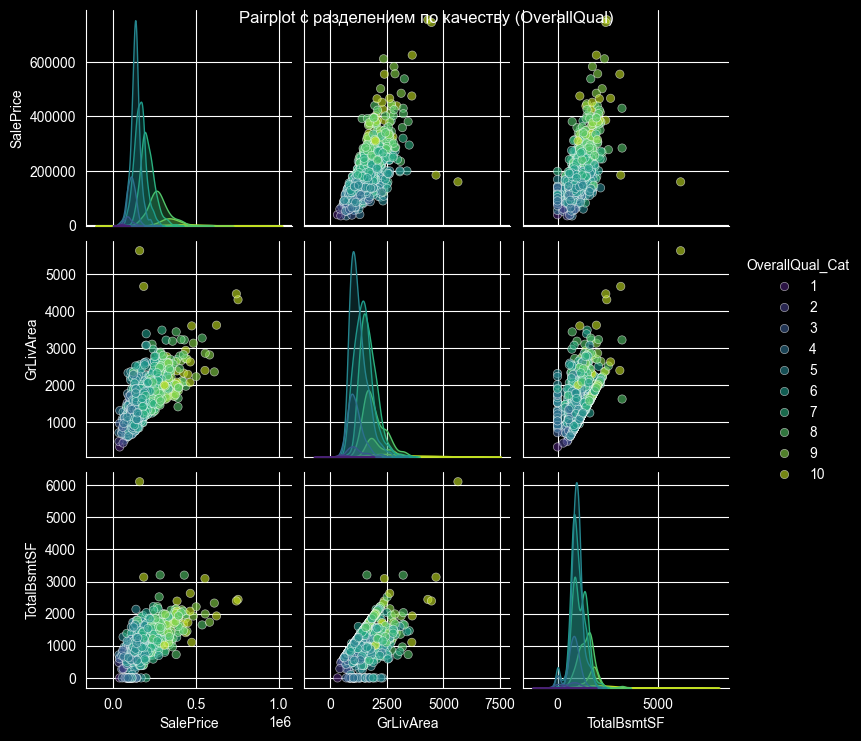


2) Jointplot: GrLivArea vs SalePrice


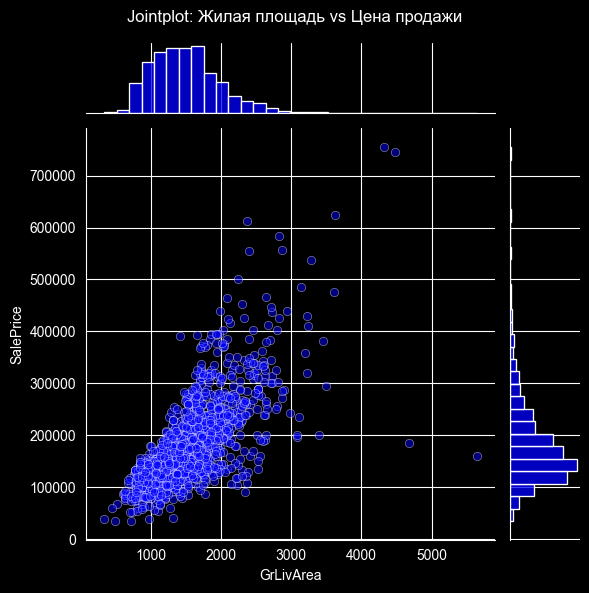


3) FacetGrid: Распределение цен по зонированию (MSZoning)


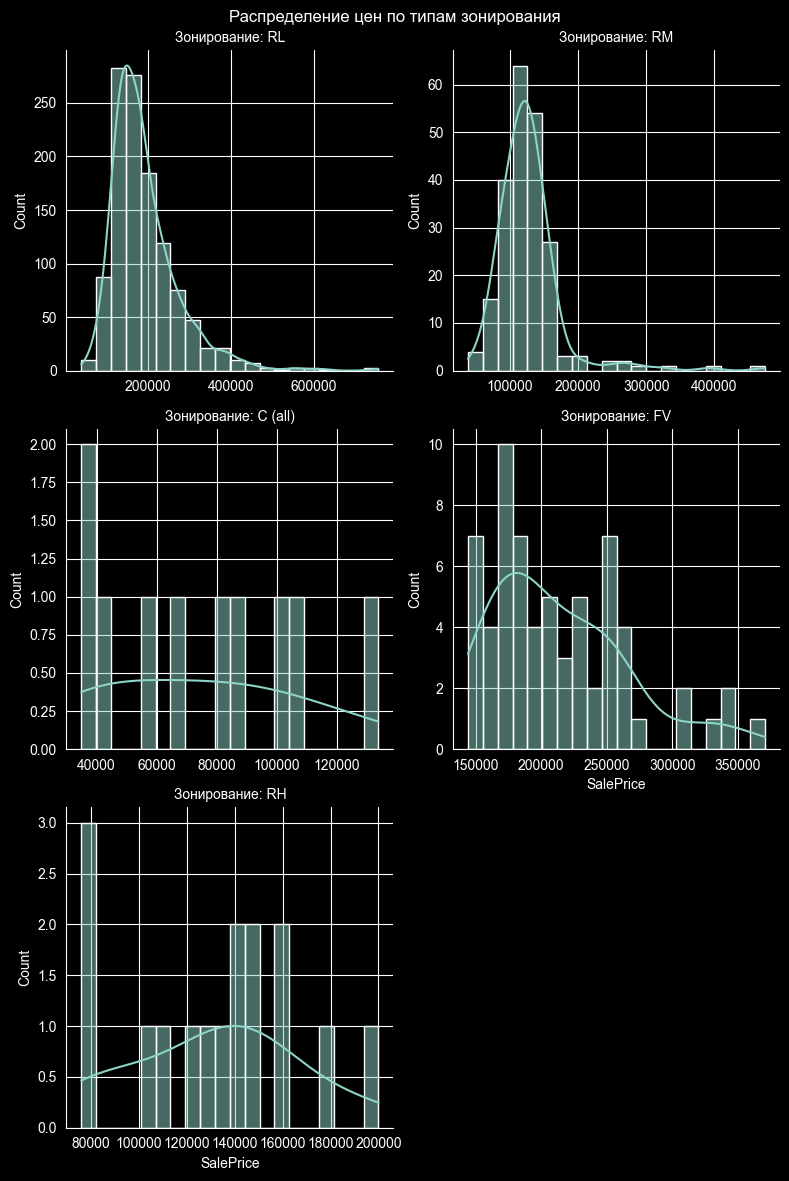


4) Сравнение Violin plot и Box plot


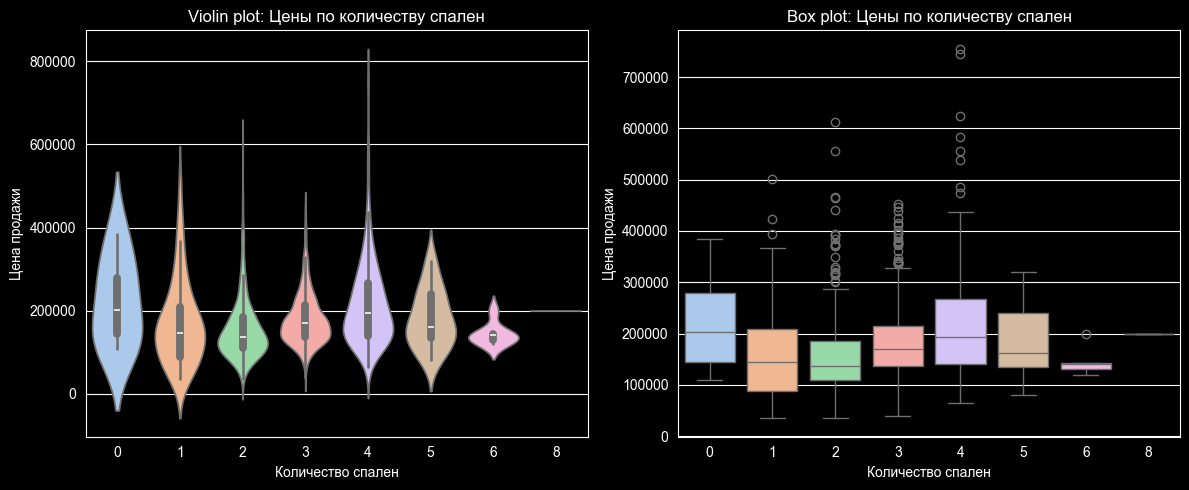


Комментарий: Violin plot показывает форму распределения,
а Box plot - только основные квантили. Violin более информативен.

4) Альтернативный вариант: одинаковая заливка для всех групп


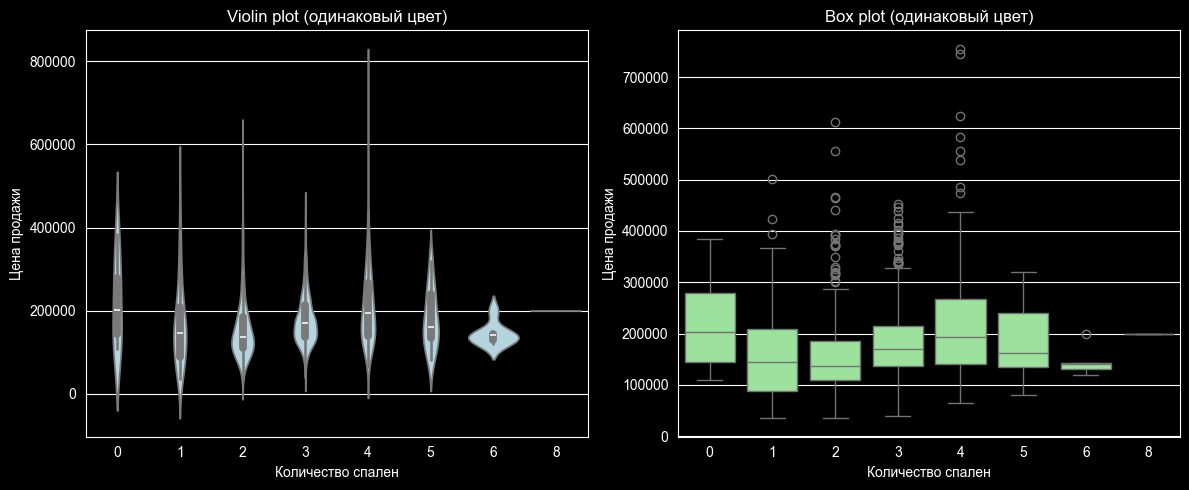


5) Heatmap корреляций с аннотациями


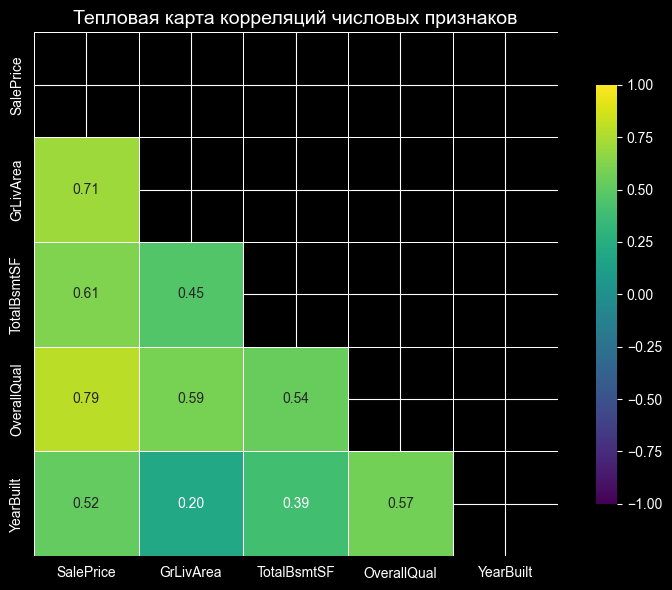


КРАТКИЙ АНАЛИЗ:
1. Pairplot показывает взаимосвязи между признаками
2. Jointplot демонстрирует связь GrLivArea и SalePrice
3. FacetGrid позволяет сравнить распределения по группам
4. Violin plot более информативен чем Box plot
5. Heatmap показывает корреляции между числовыми признаками
   Самые высокие корреляции с SalePrice:
   GrLivArea: 0.71
   TotalBsmtSF: 0.61
   OverallQual: 0.79
   YearBuilt: 0.52


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Используем датасет на House Price
df: pd.DataFrame = pd.read_csv("C:/Users/6muni/Documents/train.csv")

df["OverallQual_Cat"] = df["OverallQual"].astype("category")

# 1) Pairplot с hue (разделение по категории)
print("1) Pairplot с hue по OverallQual_Cat")
sns.pairplot(
    df[["SalePrice", "GrLivArea", "TotalBsmtSF", "OverallQual_Cat"]],
    hue="OverallQual_Cat",
    palette="viridis",
    height=2.5,
    plot_kws={"alpha": 0.6},
)
plt.suptitle("Pairplot с разделением по качеству (OverallQual)")
plt.show()

# 2) Jointplot (scatter + distributions)
print("\n2) Jointplot: GrLivArea vs SalePrice")
j = sns.jointplot(
    data=df,
    x="GrLivArea",
    y="SalePrice",
    kind="scatter",
    joint_kws={"alpha": 0.5, "color": "blue"},
    marginal_kws={"color": "blue", "bins": 30},
)
j.fig.suptitle("Jointplot: Жилая площадь vs Цена продажи")
plt.tight_layout()
plt.show()

# 3) FacetGrid для множественных графиков
print("\n3) FacetGrid: Распределение цен по зонированию (MSZoning)")
g = sns.FacetGrid(df, col="MSZoning", col_wrap=2, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "SalePrice", bins=20, kde=True)
g.set_titles("Зонирование: {col_name}")
g.fig.suptitle("Распределение цен по типам зонирования")
plt.tight_layout()
plt.show()

# 4) Violin plot vs Box plot - сравнить (ИСПРАВЛЕННЫЙ ВАРИАНТ)
print("\n4) Сравнение Violin plot и Box plot")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Violin plot - исправленный
sns.violinplot(
    data=df,
    x="BedroomAbvGr",
    y="SalePrice",
    hue="BedroomAbvGr",  # Добавляем hue
    palette="pastel",
    legend=False,
    ax=axes[0],
)
axes[0].set_title("Violin plot: Цены по количеству спален")
axes[0].set_xlabel("Количество спален")
axes[0].set_ylabel("Цена продажи")

# Box plot - исправленный
sns.boxplot(
    data=df,
    x="BedroomAbvGr",
    y="SalePrice",
    hue="BedroomAbvGr",  # Добавляем hue
    palette="pastel",
    legend=False,
    ax=axes[1],
)
axes[1].set_title("Box plot: Цены по количеству спален")
axes[1].set_xlabel("Количество спален")
axes[1].set_ylabel("Цена продажи")

plt.tight_layout()
plt.show()

print("\nКомментарий: Violin plot показывает форму распределения,")
print("а Box plot - только основные квантили. Violin более информативен.")

# Альтернативный вариант без hue (если нужны одинаковые цвета для всех групп)
print("\n4) Альтернативный вариант: одинаковая заливка для всех групп")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Violin plot - с одинаковым цветом
sns.violinplot(
    data=df,
    x="BedroomAbvGr",
    y="SalePrice",
    color="lightblue",  # Используем color вместо palette
    ax=axes[0],
)
axes[0].set_title("Violin plot (одинаковый цвет)")
axes[0].set_xlabel("Количество спален")
axes[0].set_ylabel("Цена продажи")

# Box plot - с одинаковым цветом
sns.boxplot(
    data=df,
    x="BedroomAbvGr",
    y="SalePrice",
    color="lightgreen",  # Используем color вместо palette
    ax=axes[1],
)
axes[1].set_title("Box plot (одинаковый цвет)")
axes[1].set_xlabel("Количество спален")
axes[1].set_ylabel("Цена продажи")

plt.tight_layout()
plt.show()

# 5) Heatmap с аннотациями
print("\n5) Heatmap корреляций с аннотациями")
numeric_cols = ["SalePrice", "GrLivArea", "TotalBsmtSF", "OverallQual", "YearBuilt"]
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    mask=np.triu(np.ones_like(corr_matrix), k=0),
    fmt=".2f",
    cmap="viridis",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8},
)

plt.title("Тепловая карта корреляций числовых признаков", fontsize=14)
plt.tight_layout()
plt.show()

# Дополнительный анализ
print("\n" + "=" * 50)
print("КРАТКИЙ АНАЛИЗ:")
print("=" * 50)
print(f"1. Pairplot показывает взаимосвязи между признаками")
print(f"2. Jointplot демонстрирует связь GrLivArea и SalePrice")
print(f"3. FacetGrid позволяет сравнить распределения по группам")
print(f"4. Violin plot более информативен чем Box plot")
print(f"5. Heatmap показывает корреляции между числовыми признаками")
print(f"   Самые высокие корреляции с SalePrice:")
for col in corr_matrix.columns:
    if col != "SalePrice":
        corr: pd.DataFrame = corr_matrix.loc["SalePrice", col]
        print(f"   {col}: {corr:.2f}")


# TODO:
# 1) Pairplot с hue (разделение по категории)
# 2) Jointplot (scatter + distributions)
# 3) FacetGrid для множественных графиков
# 4) Violin plot vs Box plot - сравнить
# 5) Heatmap с аннотациями

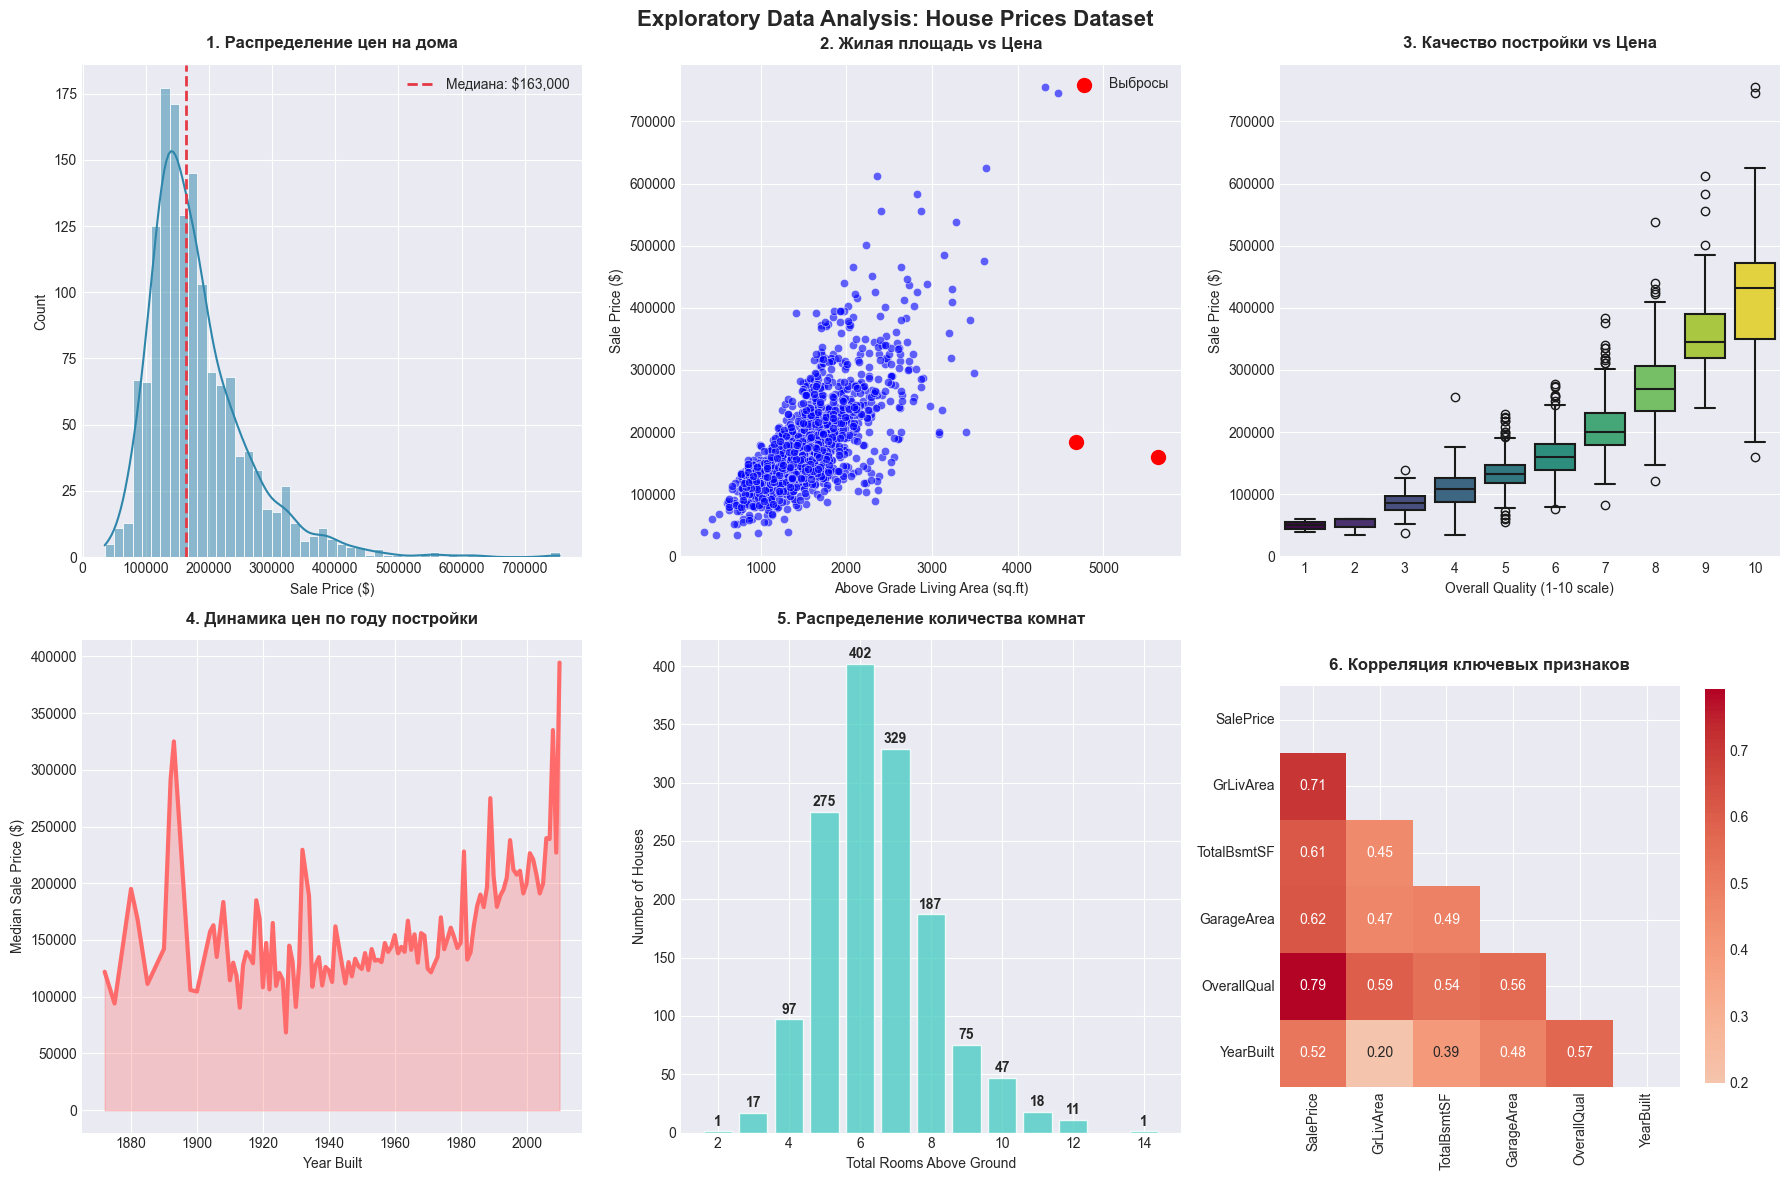

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка стиля и цветовой палитры
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(
    "Exploratory Data Analysis: House Prices Dataset", fontsize=16, fontweight="bold"
)

# Преобразуем axes в одномерный массив для удобства
axes = axes.flatten()

# ===== 1. Распределение целевой переменной =====
sns.histplot(data=df, x="SalePrice", kde=True, ax=axes[0], color="#2E86AB")
axes[0].axvline(
    df["SalePrice"].median(),
    color="#E63946",
    linestyle="--",
    linewidth=2,
    label=f"Медиана: ${df['SalePrice'].median():,.0f}",
)
axes[0].set_title("1. Распределение цен на дома", fontweight="bold", pad=12)
axes[0].set_xlabel("Sale Price ($)")
axes[0].set_ylabel("Count")
axes[0].legend()
axes[0].ticklabel_format(style="plain", axis="x")

# ===== 2. Взаимосвязь площади и цены =====
sns.scatterplot(
    data=df,
    x="GrLivArea",
    y="SalePrice",
    alpha=0.6,
    ax=axes[1],
    color="blue",
    edgecolor="w",
    linewidth=0.5,
)
axes[1].set_title("2. Жилая площадь vs Цена", fontweight="bold", pad=12)
axes[1].set_xlabel("Above Grade Living Area (sq.ft)")
axes[1].set_ylabel("Sale Price ($)")
axes[1].ticklabel_format(style="plain", axis="y")

# Выделение выбросов (если есть)
outliers = df[(df["GrLivArea"] > 4000) & (df["SalePrice"] < 300000)]
if not outliers.empty:
    axes[1].scatter(
        outliers["GrLivArea"],
        outliers["SalePrice"],
        color="red",
        s=100,
        label="Выбросы",
        zorder=4,
    )
    axes[1].legend()

# ===== 3. Качество vs Цена =====
sns.boxplot(
    data=df,
    x="OverallQual",
    y="SalePrice",
    ax=axes[2],
    hue="OverallQual",
    legend=False,
    palette="viridis",
    linewidth=1.5,
)
axes[2].set_title("3. Качество постройки vs Цена", fontweight="bold", pad=12)
axes[2].set_xlabel("Overall Quality (1-10 scale)")
axes[2].set_ylabel("Sale Price ($)")
axes[2].ticklabel_format(style="plain", axis="y")

# ===== 4. Год постройки и цена =====
year_price = df.groupby("YearBuilt")["SalePrice"].median().reset_index()
sns.lineplot(
    data=year_price,
    x="YearBuilt",
    y="SalePrice",
    ax=axes[3],
    color="#FF6B6B",
    linewidth=3,
)
axes[3].fill_between(
    year_price["YearBuilt"], year_price["SalePrice"], alpha=0.3, color="#FF6B6B"
)
axes[3].set_title("4. Динамика цен по году постройки", fontweight="bold", pad=12)
axes[3].set_xlabel("Year Built")
axes[3].set_ylabel("Median Sale Price ($)")
axes[3].ticklabel_format(style="plain", axis="y")

# ===== 5. Распределение комнат =====
room_counts = df["TotRmsAbvGrd"].value_counts().sort_index()
axes[4].bar(room_counts.index, room_counts.values, color="#4ECDC4", alpha=0.8)
axes[4].set_title("5. Распределение количества комнат", fontweight="bold", pad=12)
axes[4].set_xlabel("Total Rooms Above Ground")
axes[4].set_ylabel("Number of Houses")

# Добавление значений на столбцы
for i, v in enumerate(room_counts.values):
    axes[4].text(room_counts.index[i], v + 5, str(v), ha="center", fontweight="bold")

# ===== 6. Корреляция ключевых признаков =====
# Выбираем ключевые числовые признаки для корреляции
numeric_cols = [
    "SalePrice",
    "GrLivArea",
    "TotalBsmtSF",
    "GarageArea",
    "OverallQual",
    "YearBuilt",
]
corr_cols = [col for col in numeric_cols if col in df.columns]

corr_matrix = df[corr_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    ax=axes[5],
    square=True,
    cbar_kws={"shrink": 0.8},
)
axes[5].set_title("6. Корреляция ключевых признаков", fontweight="bold", pad=12)
plt.tight_layout()
plt.show()